In [2]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [5]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->


# מבוא, משתנים, טיפוסים, אופרטורים, תנאים

# הקדמה

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/jCJC-SCcZYE?si=xgKTHYAVK0zG1Ecu" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### מטרות הקורס

- לפתח מיומנויות בסיסיות של **תכנות** ו**חשיבה אלגוריתמית**
    - לא עוסק בפעולת החומרה של המחשב

### תוכנית הלימודים:
- יסודות התכנות ב-Python  
- רקורסיה  
- תכנות מונחה עצמים  
- חישובים מדעיים (Numpy)  
- עיבוד תמונה (Numpy)  
- ניתוח נתונים (Pandas)  
- הצגת נתונים (Pandas)

### בקליפת אגוז
- אין צורך בידע מוקדם
- עם זאת, הקצב מהיר
- הדרך היחידה להישאר בעניינים היא **תרגול**

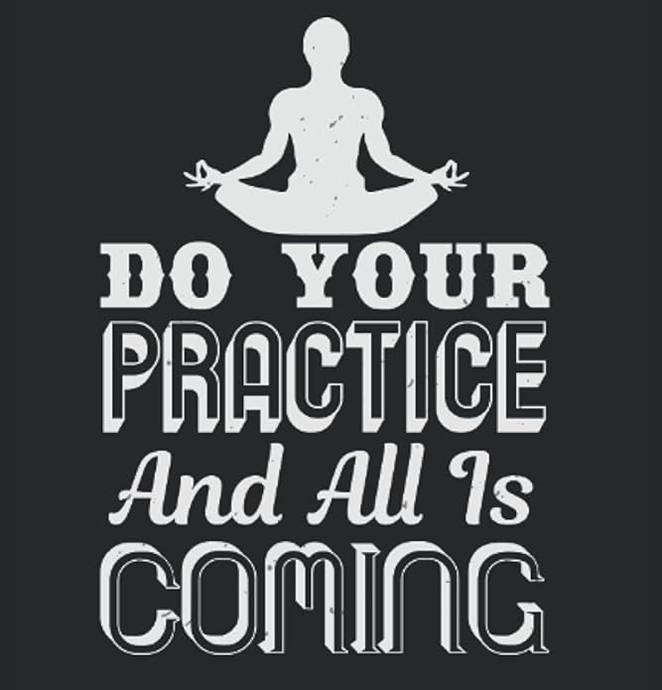

# מנהלה

#### אתר הקורס: [http://courses.cs.tau.ac.il/pyProg/2425b/](http://courses.cs.tau.ac.il/pyProg/2425b/)
- ניהול הקורס
- לוח זמנים  
- מצגות  
- מחברות Jupyter  
- מדריכי התקנה  
- מקורות חיצוניים  
- שיעורי בית  

#### מודל: [https://moodle.tau.ac.il/course/view.php?id=50918202098](https://moodle.tau.ac.il/course/view.php?id=50918202098)
- הגשת שיעורי בית  
- פורומים (כללי ולמטלות)  

#### קיים גם מודל נפרד לכל תרגול (הודעות של עוזרי הוראה וכו')


### תרגול
- מפגשים מעשיים  
- בכיתת מחשבים סטנדרטית  
- מטרות:
    - מחברות Jupyter  
        - תרגול הנושאים שנלמדו בהרצאה  
        - התנסות מעשית בכלים כמו PyCharm  
    - רקע לקראת פתרון המטלות

### שיעורי בית
- הנחיות תחת לשונית "תרגילים" באתר הקורס  
- הרבה **התנסות מעשית**
- **אין דרך אחרת ללמוד תכנות!**

#### איפה אפשר לעבוד?
- מעבדות מחשבים  
- שעות וכתובות מופיעות באתר הקורס  
    - **לגבות עם אימייל / דיסק און קי / Dropbox וכו'!**

### הנחיות הגשה
- הגשה **בודדת בלבד!**
- 7 תרגילים  
- חובה להגיש לפחות 6  
- ממוצע של 6 הטובים ביותר מהווה 25% מהציון הסופי  
- 10 ימי חסד

### מעבדה מונחית
- מפגש מעשי אופציונלי במעבדת מחשבים  
- תמיכה טכנית (PyCharm, מחברות Jupyter וכו')  
- **מומלץ להשתמש!**

### הבחינה
- הציון הסופי מורכב מהממוצע של המטלות וציוני הבחינה
- חובה לעבור את הבחינה כדי לעבור את הקורס  
- בחינה בכתב  
- כוללת את כל חומר הקורס:
    - הרצאות, תרגולים ושיעורי בית

### הנושאים להיום
- רקע קצר על תכנות  
- יסודות Python:
    - משתנים (`int`, `float`, `string`, `boolean`)  
    - אופרטורים (חשבון, השוואה, לוגיים)


# רקע

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/7TWw9rOsaXg?si=g_cFn945WIOZF6pb" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### יסודות שפות תכנות

- תוכנית מחשב היא רצף של הוראות טקסט שניתן "להבין" על ידי מחשב ולהריץ.

- שפת תכנות היא שפה מלאכותית, קריאה למכונה, שנועדה לבטא חישובים שניתן לבצע במחשב.

- בויקיפדיה מופיעות מעל 500 שפות תכנות שונות.





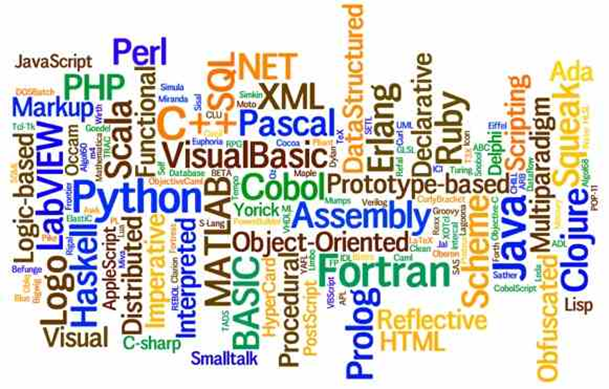

###  קוד מכונה (שפת מכונה)

- המחשב מבין אך ורק שפת מכונה, המורכבת מרצפים של אפסים ואחדות.
- צפו כעת סרטון על מנת להבין כיצד מספרים מיוצגים בשפת מכונה 

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/WYkkkM6vCx0?si=NstLcocgJ9vKoLtR" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


### משפת מכונה לשפת תכנות (ולהיפך)
- מעבר לייצוג מספרים, ניתן לייצג במחשב גם פקודות באמצעות שפות מכונה.
- שפות המכונה מאוד לא נוח לעבודה ולא אינטואיטיבית לבני אדם, ולכן פותחו שפות תכנות שונות כמו Python, Java ו-C על מנת לגשר על פער זה.  
- בני האדם כותבים בשפת תכנות. על מנת לבצע פקודות אלו (או "להריץ את התכנית"), מחשב תחילה "מתרגם" את שפת התכנות לשפת מכונה.  
- בקורס הזה, לא נעסוק באיך המחשב מבצע את התרגום הזה.

### תוכנית מחשב

- רצף של הוראות שנועד להשיג מטרה מסוימת.  
- ההוראות מתבצעות לפי סדר. אף הוראה לא מתבצעת לפני שההוראה הקודמת הושלמה.


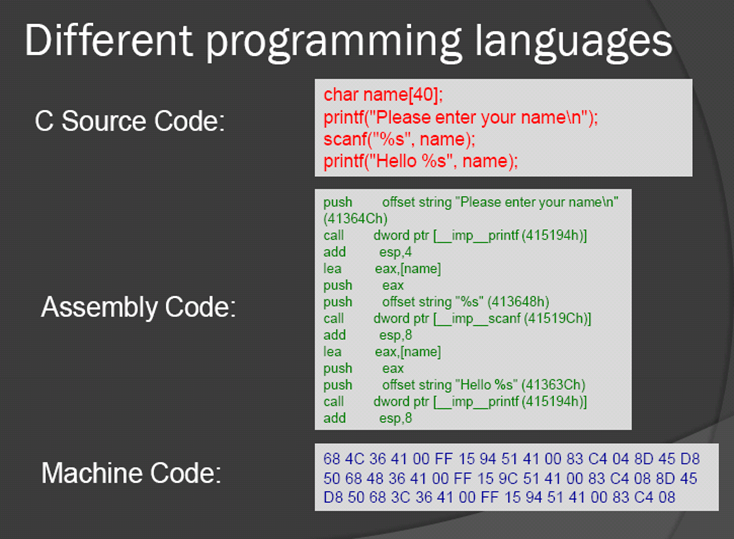



In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/PbvcUBaoHjg?si=XqBXBgLLDaeicHEw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Python
- מאז 1991  
- קל ללמידה  
- זמן פיתוח קצר  
- מהיר מספיק לרוב היישומים  
- קהילה עצומה  
- בשימוש נרחב בתעשייה  
- Machine Learning  

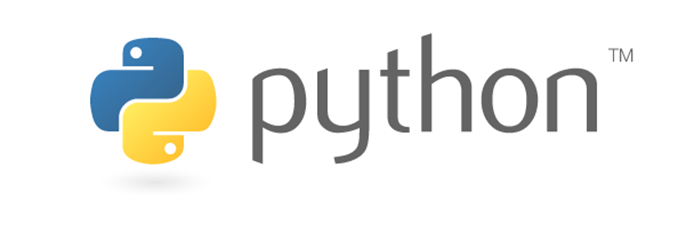

### התקנה והרצה של Python  
- התקינו את Anaconda [דרך הקישור הזה](https://www.anaconda.com/docs/getting-started/anaconda/install)
- התקינו את PyCharm **Community Edition**. ניתן להעזר [במדריך הזה](https://courses.cs.tau.ac.il/pyProg/2324b/resources/pycharm%20tutorial.pdf)  
    - השתמשו אך ורק ב-**Python 3.11.x**   

In [6]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "איזה פייתון צריך להתקין?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "3.11",
                "correct": true,
                "feedback": "יאססס"
            },
            {
                "answer": "3.9",
                "correct": false,
                "feedback": "נופ"
            },
            {
                "answer": "3.12",
                "correct": false,
                "feedback": "נופ"
            },
            {
                "answer": "3.6",
                "correct": false,
                "feedback": "נופ"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

לפניכם תוכנית קצרה בפייתון. לחצו על כפתור ההרצה (Run) וצפו בפלט של התוכנית בחלק התחתון של החלונית.

בעולם מדעי המחשב ישנה מוסכמה מקובלת שהתוכנית הראשונה שכותבים כאשר לומדים שפת תכנות חדשה היא תוכנית שמדפיסה למסך את המילים "Hello World!"

In [7]:
print("Hello World!")

Hello World!


## הקדמה לפייתון

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/i9KoiRG9qRE?si=_WnXRCMNISFVosP5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/-aW962IwwkQ?si=HnYD_AweMgFw8ePm" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# משתנים, טיפוסים ואופרטורים

### סוגי נתונים (**טיפוסים/types**) ב-Python  
- טיפוסים נפוצים:
    - מספריים: `int` ,`float`
    - לוגיים/בוליאניים: `bool`
    - טקסט/מחרוזת: `str`
- למה צריך סוגים שונים?
    - חיסכון בזיכרון  
    - מהירות ביצוע  
    - לכל טיפוס יש פעולות ייחודיות (**אופרטורים**)
        - לדוגמא, בטיפוסים במספריים ניתן לבצע פעולות חיבור וחיסור 

#### במודול זה נרחיב על כל טיפוס ואילו פועלות ניתן לעשות עליו

### טיפוסים מספריים: `int` ו`float`

In [9]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/r3Zt6XPlzyU?si=4MUoXvX3j38GxC0q" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [9]:
# This is my first Python program!
print(13)
print(10)
print(1+2)
print       (      7    -      4   )
print(3*8) # This line prints 24
print(10/4)
print(2.3+1.7)
print(17 - 3*5)
print((17 - 3)*5)

13
10
3
3
24
2.5
4.0
2
70


בסרטון הכרנו את הטיפוסים המספריים וראינו כיצד לבצע פעולות חשבון בסיסיות על מספרים. ראינו שם שפייתון יודע לעבוד עם מספרים שמכילים נקודה עשרונית, כמו למשל 3.14 או 4.0. 

בפייתון, מספרים עם ובלי נקודה עשרונית הם שני סוגים שונים של נתונים. באופן כללי במדעי המחשב, סוגי הנתונים השונים נקראים טיפוסי-נתונים **(data-types)** או מחלקות **(classes)**. לכל טיפוס יש דרך מסויימת שבה הוא מיוצג בזיכרון של המחשב.

מספרים שלמים ללא נקודה עשרונית, כמו המספרים 4, 0 או 56 - שייכים למחלקה שנקראת `int`, שזה קיצור של **integer**, "מספר שלם" באנגלית.

לעומת זאת, מספרים שמכילים נקודה עשרונית כמו 3.14 שייכים למחלקה אחרת שנקרא `float`, זה קיצור של **floating point** או "נקודה צפה", על שם הייצוג מספר עם נקודה עשרונית.

אפשר לערב באותו ביטוי מספרים משתי המחלקות האלו – `int` ו-`float`. למשל, החישוב 1+2.5 יתן לנו 3.5. תוצאת החישוב שייכת לטיפוס `float` כמובן.

באופן כללי, אם ביטוי חשבוני מכיל גם ערכים מטיפוס `int` וגם ערכים מטיפוס `float`, התוצאה תהיה מטיפוס `float`.

אבל יש מקרים שבהם ביטוי מכיל רק מספרים שלמים מטיפוס `int`, ועדיין התוצאה היא מספר עם נקודה עשרונית. זה מה שקורה כשמחלקים שני מספרים. למשל, אם תדפיסו את תוצאה החישוב `print(10/4)` תקבלו 2.5, מספר מטיפוס `float`, ואיפול אם תחלקו את 10 ב2 `print(5/10)` תקבלו 2.0, מספר מטיפוס `float`, בעוד 2 (בלי הנקודה העשרונית) הוא מטיפוס `int`.  

בהמשך נכיר עוד טיפוסים בשפת פייתון, כאלה שלא מייצגים מספרים אלא סוגי נתונים אחרים.



עד כה ראינו את האופרטורים החשבוניים חיבור (+), חיסור (-), כפל (*), וחילוק (/).

כעת נכיר האופרטור `//`, או  **floor division**.

האופרטור `//` נותן לנו רק את החלק השלם של תוצאת החלוקה. חלק זה נקרא גם המנה של החלוקה, ומכאן השם שבכותרת.
למשל, כאשר מחלקים 10/4, התוצאה היא 2.5. החלק השלם של התוצאה הוא 2, או במילים אחרות 4 נכנס ב-10 פעמיים שלמות (ונשארת עוד שארית של 2). כאשר מחשבים 4//10 מקבלים רק את המנה, כלומר 2.

האופרטור `//` אם כן מעגל את תוצאת החלוקה למטה, כלומר מסיר את השארית שאחרי הנקודה. זו גם הסיבה שבאנגלית קוראים לו **floor division** – חלוקת "רצפה" (כלומר חלוקה שמעוגלת לרצפה, למטה).

להלן מספר דוגמאות שדרכן נבין את ההבדל בין `/` ל`//`. הוסיפו פקודות דומות אם אתם מרגישים צורך לראות עוד דוגמאות:

In [11]:
# Division examples
print(10/4, 10//4)
print(10/3, 10//3)
print(3/4, 3//4)


2.5 2
3.3333333333333335 3
0.75 0


חישוב החלק השברי, זה שמיוצג על ידי הספרות שאחרי הנקודה ונקרא שארית או **modulo** ומחושב באמצעות האופרטור `%`. 



In [12]:
# Modulo examples
print(10%4)
print(10%4)
print(3%4)

2
2
3


פעולה אריתמתית נוספת שנראה כעת היא פעולה ה**חזקה**, המיוצגת ע"י 2 כוכביות `**`

In [30]:
print(4**3)
print(3**0)


64
1


<h4 style='color:purple'>
בחנו את עצמכם
</h4>

In [5]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה ההבדל בין שני האופרטורים / ו- // כאשר הם מופעלים על מספרים מטיפוס int ותוצאת החלוקה היא מספר שלם (ללא שארית)? לדוגמה, מה ההבדל בין 10/5 ל 5//10?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "לחץ כאן כדי לגלות את התשובה",
                "correct": true,
                "feedback": "10/5 הוא ביטוי שערכו 2.0. לעומת זאת, 5//10 הוא ביטוי שערכו 2. כלומר הערך הראשון הוא מטיפוס float ואילו השני מטיפוס int. באופן כללי, כאשר a ו-b הם מספרים מטיפוס int ביטוי מהצורה a/b יהיה תמיד מטיפוס float, בעוד ביטוי מהצורה a//b יהיה תמיד מטיפוס int."
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [34]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה תהיה תוצאת הפעולה 10%5?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "לחץ כאן כדי לגלות את התשובה",
                "correct": true,
                "feedback": "השארית של חלוקת 10 ב5 היא 0 ולכן התוצאה תהיה 0"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [35]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה תהיה תוצאת הפעולה 0.5**4?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "לחץ כאן כדי לגלות את התשובה",
                "correct": true,
                "feedback": " תוצאת הפעולה תהיה 2.0 מכיוון שחזקת 0.5 היא למעשה פעולת שורש. שימו לב שטיפוס  התוצאה הוא float"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

#### עבור כל אחד מהביטויים הבאים, ענו האם הוא מטיפוס int או float:

In [13]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "3*4",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "float",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [14]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "1.8+1.2",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "float",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [15]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "30/6",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "float",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [16]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "5//31",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "float",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

### סיכום פעולות אריתמתיות

| אופרטור | שימוש  | תיאור                                                                 |
|----------|--------|------------------------------------------------------------------------|
| +        | x + y  | סכום של x ו־y                                                          |
| -        | x - y  | חיסור y מ־x                                                             |
| *        | x * y  | כפל של x ב־y                                                            |
| **       | x ** y | חזקה של x בחזקת y                                                      |
| /        | x / y  | חילוק של x ב־y                                                         |
| //       | x // y | חילוק שלם של x ב־y: מחזיר את החלק השלם (מעוגל למטה) של תוצאת החילוק |
| %        | x % y  | מודולו: השארית של החילוק של x ב־y                                     |


### טיפול בשגיאות (או מה קורה כאשר כתבנו משהו או נכון?) 

In [19]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/0GofXMPUBek?si=bjzIa0R9iv-fA7lU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

<h4 style='color:purple'>
בחנו את עצמכם
</h4>

חלונית הקוד שלפניכם מופיעה תוכנית בה חלק מהשורות גורמות לשגיאה. עליכם לתקן את כל השגיאות כך שהתוכנית תרוץ עד סופה (ובפרט, בסוף תודפס המילה "success"). ניתן לתקן את השגיאות בכל דרך שתרצו, אך אסור למחוק את כל השורה של פקודה שגורמת לשגיאה.

In [20]:
print( 1 + 2 - 3 * 4 / 5 ! 6)
print(12.3 ** 8 + (12 - 4))
print(14 / (7 - (4 + 3)))
print( 2 + 4) * 6)
print ("<h3>success!</h3>")

SyntaxError: unmatched ')' (3579508377.py, line 4)

### משתנים (**variables**) והשמות (**assignment**)

### אחסון נתונים בזיכרון  
- תוכניות מחשב מעבדות נתונים  
- הנתונים מתקבלים כקלט או מחושבים ע"י התוכנית  
- כדי להשתמש בהם שוב בהמשך – צריך לזכור אותם  
- לכן, תוכניות משתמשות במשתנים (**variables**) כדי לשמור נתונים בזיכרון  
- לכל משתנה יש:
    - ערך (התוכן, הנתונים עצמם)
    - שם (קיצור דרך לכתובת בזיכרון)
    - טיפוס (type): סוג המשתנה. לדוגמא:
        -  טיפסים שכבר הכרנו: מספרים -`int` ו`float`
        -  טקסט/מחרוזת (`str`) וערכים לוגיים (`bool`), אותם נכיר בהמשך 

### משתנים בתוכנית  
- לכל משתנה יש: שם, ערך, סוג (וכתובת בזיכרון)  
- ב-Python יוצרים משתנים ע"י השמת ערך לשם:



```python
s = "bob"
r = True
age = 35

```

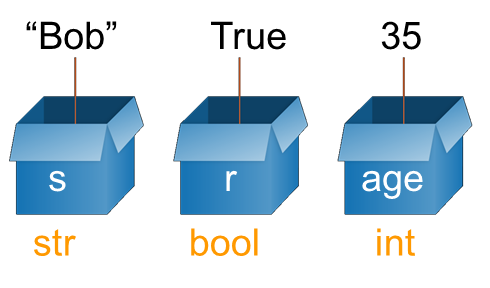

טיפוסי המשתנים נקבעים אוטומטית לפי ערכים שהוכנסו אליהם והפעולות שבוצעו עליהם

### סוגי נתונים – דוגמא

```python
n = 17
pi = 3.14159
message = "what's up Doc?"
b = True
```

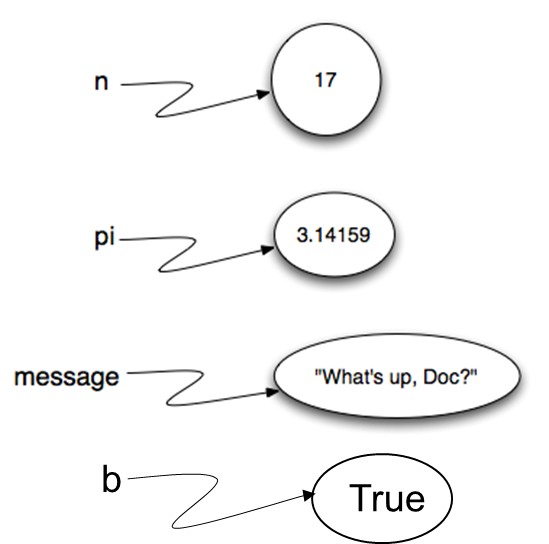

In [25]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_mHztcKrRD8?si=-Lk6recWKHAr5tiz" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

<h4 style="color:purple">
בחנו את עצמכם
</h4>

1. עבור קטע הקוד הבא, קבעו מהו ערכם של המשתנים x,y,z בתום ריצת הקוד

In [37]:
x = 12 
y = 7 
z = x - y 
x = z*2 + 3 
y = z - x + 16

2.  הגדירו שני משתנים - x ו-y. ערכו של x יהיה הגיל שלכם (בשנים), וערכו של y יהיה 3 הספרות האחרונות של מספר הטלפון שלכם (אם הספרה הראשונה מבין ה-3 היא 0 - התעלמו ממנה. למשל: אם 3 הספרות הן 012, אז y = 12).

    הדפיסו – באמצעות הפקודה print – את סכום המשתנים (x+y), הפרש המשתנים (x-y), מכפלת המשתנים (x*y) ומנת המשתנים (x/y). בידקו שהתוצאות אכן נכונות על ידי חישוב ידני או שימוש במחשבון.

In [39]:
# Write your solution here

### השמה למשתנים
- צד שמאל = שם משתנה  
- צד ימין = ביטוי  

```python 
n = 10
m = (10 + 4) * 5
```
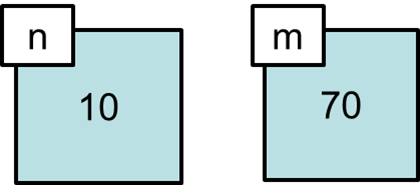

- שם של משתנה: מורכב מאותיות וספרות, ומתחיל באות  
 
**המפרש (interpreter):**  
- מחשב את הביטוי  
- משייך את הערך לשם המשתנה  

### משתנים והשמות – דוגמה  

- שינוי ערך של משתנה

In [ ]:
n=10
print(n)

In [ ]:
n=11
print(n)

- שינוי סוג של משתנה 

In [ ]:
print(type(n))
n = 1.3141
print(type(n)) 

- ניתן להשתמש במשתנים בתוך ביטויים  

In [ ]:
pi = 3.14159
print(pi * 2 + 1)

- שימוש במשתנה שלא הוגדר יגרום לשגיאת ריצה

In [ ]:
check_this

### דוגמאות נוספות להשמה

<h4 style="color:purple">
התנסו עצמכם
</h4>

In [ ]:
a=3
print(a)
b=5
print(b)
c = a + b
print(c)
c = c * 2
print(c)
print(b**a)
print(b/a)
print(b//a)
print(b%a)

### הפקודה `type` מחזירה את סוג המשתנה או הביטוי

In [ ]:
a=5
print(a)

In [ ]:
print(type(4))

In [ ]:
print(type(3.14159))

### הבנת קוד באמצעות Python tutor

In [37]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/nSktoxcZA9Q?si=Tp5wvQgfBHbfkeV1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

<h4 style="color:purple">
התנסו בעצמכם
</h4>

לפניכם מוצגת חלונית של Python Tutor ובה הקוד אותו ראינו בסרטון. הריצו את הקוד בצורה מבוקרת, כפי שראינו בסרטון. שימו לב איך המשתנים נוצרים ומשתנים בצד ימין של החלונית, וכיצד הפלט מופיע בחלונית הפלט. כשאתם מרגישים שהבנתם איך משתמשים ב-Python Tutor, אתם מוזמנים להמשיך ליחידה הבאה.

In [38]:
%%html
<iframe width="800" height="400" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=x%20%3D%2010%0Ay%20%20%3D%207%0Ax%20%3D%2011%0Aprint%28x%29%0Aresult%20%3D%20x%20%2B%20y%0Aprint%28result%29%0Aresult%20%3D%20result%20%2B%201%0Aprint%28result%29&amp;codeDivHeight=400&amp;codeDivWidth=350&amp;cumulative=false&amp;curInstr=0&amp;heapPrimitives=nevernest&amp;origin=opt-frontend.js&amp;py=3&amp;rawInputLstJSON=%5B%5D&amp;textReferences=false"> </iframe>

### השוואות בין מספרים

In [28]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/g07UI_J-Cng?si=IwnyDfKcV2GN0g0G" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם.**

In [44]:
#print(3 < 4)
#print(3 > 4)
x = 3
y = 4
# print(x*2 < y  + 1)
# print(x==y)
# print(x+1 == y)
# x = y
# print(x)
# print(y)a
# print(3 != 4)
# print(3 <= 4)
# print(3 <= 3)
# print(3 >= 4)
print(3 >= 3)

True


#### בחנו את עצמכם

In [51]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה מדפיסה הפקודה הבאה: print(3 * 2 != 6)",
        "type": "many_choice",
        "answers": [
            {
                "answer": "מודפסת הודעת שגיאה - התחביר לא תקין בגלל השימוש בסימן !",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "False",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "True",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [61]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה מדפיסה הפקודה הבאה: print(3 <= 3)",
        "type": "many_choice",
        "answers": [
            {
                "answer": "הודעת שגיאה - לא ניתן להפעיל את האופרטור => על שני מספרים שווים.",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "False",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "True",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

לפניכם קטע קוד ובו 3 משתנים - x,y,z. המשתנים מאותחלים ל-0. לאחר אתחול המשתנים, ישנן מספר הדפסות של פעולות השוואה הכוללות את המשתנים הנ"ל. עליכם לשנות את ערכם של x,y,z עד שכל ההדפסות מדפיסות True.

רמז: יש לפחות משתנה אחד שעבורו יש מספר ערכים שיובילו לפתרון נכון, ויש לפחות משתנה אחד שעבורו יש רק ערך אחד אפשרי.

נסו להבין מיהו המשתנה שעבורו רק ערך אחד אפשרי, והמשיכו משם. בנוסף, הפתרון עשוי לכלול ערכים שאינם שלמים.

In [ ]:
x = 0
y = 0
z = 0
print(x + y < z)
print(3*x == 2*y)
print(z < 20)
print(x + 1 == 6)
print(y / 3 >= 2)

### סיכום אופרטורי השוואה  
- משווים בין משתנים ומחזירים ערך בוליאני (True / False)


| אופרטור   | שם            | תיאור                                                                 |
|-----------|----------------------|------------------------------------------------------------------------|
| x < y     | קטן מ־               | אמת אם x קטן מ־y, אחרת שקר.                                           |
| x > y     | גדול מ־              | אמת אם x גדול מ־y, אחרת שקר.                                          |
| x <= y    | קטן או שווה ל־       | אמת אם x קטן או שווה ל־y, אחרת שקר.                                   |
| x >= y    | גדול או שווה ל־      | אמת אם x גדול או שווה ל־y, אחרת שקר.                                  |
| x == y    | שווה                 | אמת אם x שווה ל־y, אחרת שקר.                                          |
| x != y    | שונה                 | אמת אם x שונה מ־y, אחרת שקר.                                          |


<h4 style="color:red">שימו לב</h4>

- הערכים True וFalse פעולות ההשוואה הן מטיפוס בוליאני (`bool`). נרחיב את טיפוס זה בהמשך
- כל אופרטורי ההשוואה שראינו כאן רלוונטיים גם לטיפוסים אחרים יכולים להיות מופעלים גם על טיפוסים אחרים כמו `bool` ו`str`. גם על כך נרחיב בהמשך

In [ ]:
print(5==5.0)

In [ ]:
print(6!=2*3)

In [ ]:
print(3<=3)

In [ ]:
x=3<3
print(x, type(x))

In [ ]:
print('a'!='b')

In [ ]:
print(-2>=1)

## מחרוזות  


על מנת לייצג טקסט, נשתמש בערכים מסוג מחרוזת (**string**). בפייתון, שם הטיפוס הוא `str`

מחרוזת מיוצגת ע"י רצף סדור של תווים המוקף בגרשיים או בגרש בודד. לדוגמא, "hello world' או "hello world'

In [42]:
s = "hello world"
print(s)
print(type(s))

hello world


In [39]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/nYMuU3aowfM?si=yRZeaGjz_vr2oQZe" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם.**

In [ ]:
# print(Hello world!)
# print(3)
# print("3")
# print(3 + "3")
s = "This is a string"
# print(s)
print("3+4 =", 3*4)

<h4 style="color:purple">
בחנו את בעצמכם
</h4>

בתרגיל זה תדפיסו מחרוזת מורכבת שתדפיס את שמכם ואת גילכם.
תחילה, הגדירו שני משתנים:

המשתנה הראשון ייקרא name וערכו יהיה מחרוזת עם השם שלכם.
המשתנה השני ייקרא age וערכו יהיה הגיל שלכם בשנים.

לדוגמה: סטודנטית בת 22 בשם הילה תגדיר את המשתנים הבאים:


```python
name =  "Hila"
age =  22
```

לאחר מכן, עליכם להדפיס מחרוזת מורכבת (תוך שימוש בפקודה print עם פסיקים, כפי שהודגם בסרטון) שתדפיס את השם ואת הגיל לפי הפורמט הבא:

```python
"My name is <your name> and I am <your age> years old"
```


כאשר במקום <your name> יופיע השם שלכם כפי שהוגדר במשתנה name, ובמקום <your age> יופיע הגיל שלכם כפי שהוגדר במשתנה age. למשל, כאשר הסטודנטית הילה, אותה פגשנו זה עתה, תריץ את הקוד שלה, יודפס:

```python
"My name is Hila and I am 22 years old"
```

רמז: כדי לייצר מחרוזות מורכבות יש להפריד בין חלקי המחרוזת בעזרת פסיקים.

In [45]:
### write your code here

### פעולות על מחרוזות

In [40]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/gXgRasJdBKs?si=2acga8sLqyc2Cq0d" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם.**

In [46]:
# print("Hello " + "World")
# print("Hello" + " " + "World")
# print("Hello" * 3)
s1 = "Hello"
s2 = s1 * 3
# print(s2)
# print(("Hello" + "World") * 2)
# print(len("a b c d e"))
# print(len(""))
# print("H" in "Hello")
# print("ell" in "Hello")
# print("G" in "Hello")
print("bell" in "Hello")

False


<h4 style="color:purple">
בחנו את בעצמכם
</h4>

מה מודפס בקטע הקוד הבא:

```python
s="ab"
print(s*(len(s)+len("")))
```

In [49]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "type": "many_choice",
        "answers": [
            {
                "answer": "ab",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "abab",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "2",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "מחרוזת ריקה",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [ ]:
print(s[0])
print(s[-1])

### אינדקסים של מחרוזות

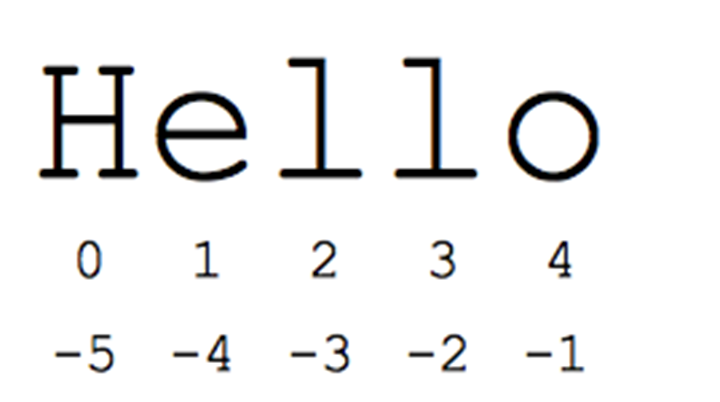

In [ ]:
a = 'Hello'

In [ ]:
print(str.find(a, 'H'))
print(a.find('H'))

In [ ]:
print(a[0])
print(a[1])
print(a[-1])
print(a[4])

In [ ]:
print(a[5])

### גישה לתווים בתוך מחרוזת  

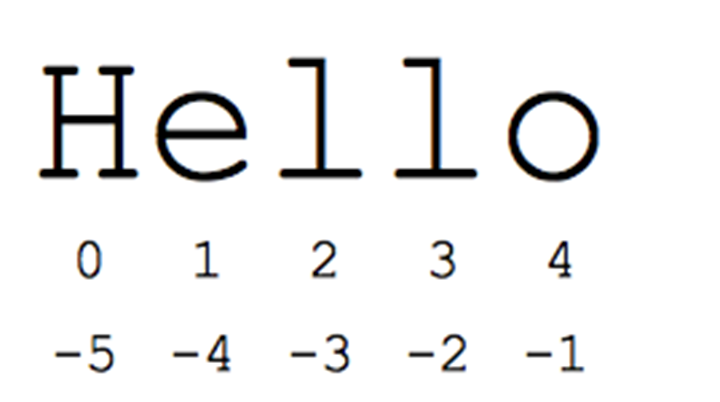

In [ ]:
a = 'Hello'

In [ ]:
print(a[1])
print(a[1:3])
print(a[1:])

In [ ]:
print(a[-4:-2])
print(a[:-3])
print(a[-3:])

In [50]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/G9f1tHkVKOk?si=HN2R0Eb_qszSkWvF" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [51]:
#print("ab" == "ab")
#print("ab" != "ab")
#print("ab" < "cd")
#print("abc" < "!@#")
s = "Python"
# print(s[0])
# print(s[1])
# print(s[2])
# print(s[3])
# print(s[4])
# print(s[5])
#print(s[6])
print(s[len(s) - 1])

n


###  סיכום: אופרטורים של מחרוזות

| אופרטור    | תיאור                                                                 | דוגמה                                 |
|------------|----------------------------------------------------------------------|----------------------------------------|
| +          | שרשור - מחבר ערכים משני צידי האופרטור                                | `a + b` יתן `'HelloPython'`            |
| *          | חזרה - יוצר מחרוזות חדשות ע״י שרשור חוזר של אותה מחרוזת             | `a*2` יתן `'HelloHello'`               |
| []         | חיתוך - מחזיר תו לפי מיקום נתון במחרוזת                             | `a[1]` יתן `'e'`                        |
| [:]        | חיתוך טווח - מחזיר תווים בטווח נתון                                 | `a[1:4]` יתן `'ell'`                    |
| `in`       | בדיקת חברות - מחזיר אמת אם תו קיים במחרוזת                          | `'H' in a` יתן `True`                  |
| `not in`   | בדיקת אי-חברות - מחזיר אמת אם תו לא קיים במחרוזת                   | `'M' not in a` יתן `True`              |


### ייצוג מחרוזות במחשב  
- לכל תו במחרוזת יש מספר לפי טבלת ASCII  
- המחרוזות נשמרות בזיכרון כרצף מספרים בינאריים  
- ב-Python:
    - `\n` מייצג ירידת שורה
` מייצג ירידת שורה  
    - `\t` מייצג טאב

### טבלת ASCII 

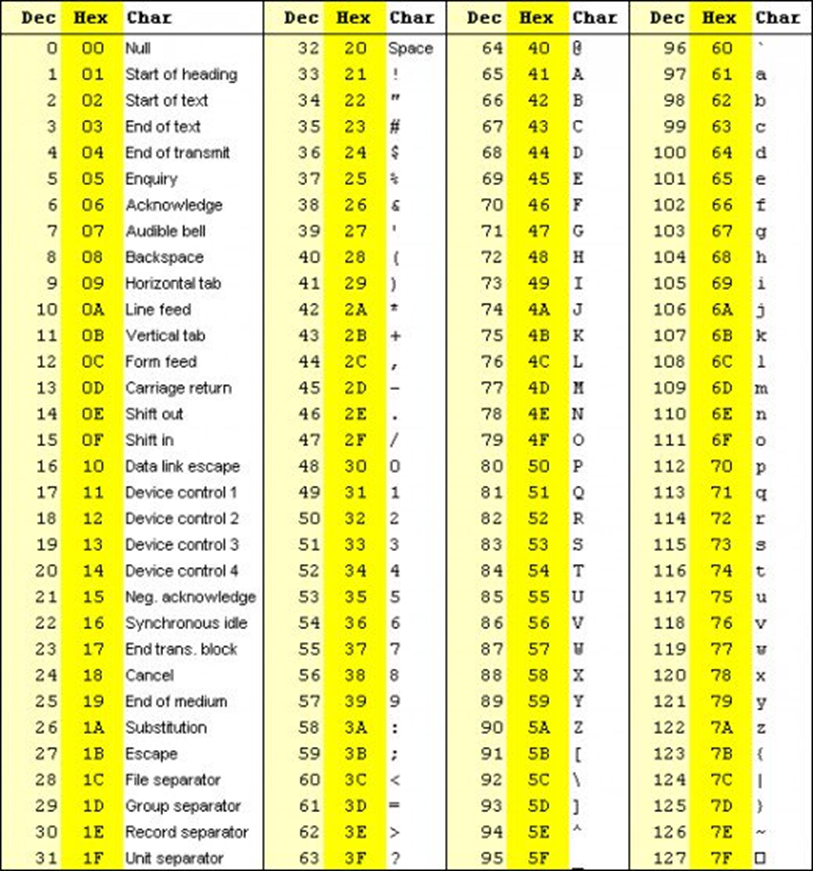

### מחרוזות הן אובייקטים בלתי ניתנים לשינוי (immutable objects)  
- לא ניתן לשנות מחרוזת קיימת 

In [ ]:
a = "abc"
a[0] = "d"

- ניתן להצביע עם משתנה קיים על מחרוזת חדשה

In [ ]:
a="abc"
print(a)
a="gggg"
print(a)

#### אובייקטים בלתי ניתנים לשינוי  
- אובייקטים אלו לא ניתנים לשינוי לאחר יצירתם  
- כל פעולה מחזירה משתנה חדש במקום לשנות את המקורי  

In [ ]:
a = "hello"
b = a.title()
print("a value is:", a)
print("b value is:", b)

### פונקציות של מחרוזות (שיטות)  
- טיפוס `str` ב-Python ישנן שיטות רבות  

In [ ]:
print(str.upper('Assaf'))
print(str.upper('Assaf'))
print(str.lower('Noga'))
print(str.replace('Python class occurs on Mondays', 'Mondays', 'Tuesdays'))
print('Py' + 'thon')
print(str.title('python course for engineers'))
print(str.title(str.replace('Python class occurs on Mondays', 'Mondays', 'Tuesdays')))
print('repeat' * 4)

### פונקציות נוספות של מחרוזות  
- **`len`**  
- `find`, `startswith`, `endswith`  
- `isalpha`, `isdigit`, `islower`  
- `join`, `replace`  
- `strip`, `rstrip`  
- `split`

**<span style="color:red">השיטות האלו חשובות מאוד! חובה להכיר אותן כדי לפתור בעיות רבות.</span>**

למידע נוסף: http://www.tutorialspoint.com/python/python_strings.htm  
חפשו בגוגל שיטות נוספות של `str`…


## המרות טיפוסים  
- באופן עקרוני ניתן לבצע המרה מכל טיפוס לכל טיפוס.
- ההמרה תתבצע בהצלחה רק אם הערך שאותו מנסים למהיר "הגיוני" עבור טיפוס אליו מנסים להמיר
    - לדוגמא את המחרוזת "12" נוכל להמיר לטיפוסים `int` ו`float`, אך "10.5" נוכל להמיר בהצלחה ל`float` בלבד, ואת "hello world" לא ניתן להמיר בהצלחה באף אחד מהטיפוסים הללו
    - לעומת זאת, ניתן להמיר כל מספר (`int` ו`float`) ל`str`
- המרה שנכשלת תחזיר שגיאה
- ניתן לבצע המרה גם לטיפוסים שנלמד בהמשך



<h4 style="color:purple">
התנסו בעצמכם
</h4>

In [ ]:
num = 123
print(num, type(num))
num_str = str(num)
print(num, type(num))
num_float = float(num)
print(num_float, type(num_float))

## טיפוס בוליאני ואופרטורים בוליאניים

**טיפוס בוליאני** מייצג אמת ושקר, כלומר קיימים רק 2 ערכים אפשריים בלבד לטיפוס זה: `True` ו-`False`. 

#### שימו לב 
- `True` ו-`False` הן מילים שמורות בשפה (בדומה ל`+` '=' וכו'), כלומר, לא ניתן להשתמש בהם לצרכים אחרים כמו הגדרת משתנים
- `True` ו-`False` תמיד יופיעו עם אות גדולה בהתחלה ואותיות קטנות בהמשך
  
טיפוסים בוליאניים שימושיים בבדיקות שנעשה על הנתונים שלנו הם התוצאות של פעולות ההשוואה שכבר פגשנו, וניתן להמשתמש בהם גם לצורך בניית תכניות מורכבות באמצעות תנאים ולולאות כפי שנראה בהמשך

In [136]:
a = True
b = 2>1 
c = False
d = 1>2

**אופרטורים בוליאניים** פועלים על ערכים בוליאניים ומחזירים ערך בוליאני  

קיימים שלושה אופרטורים לוגיים: `and` `or` ו-`not`

#### האופרטור `and`

- תחביר: `a and b`
- מחזיר True אם גם a וגם b הם True. אחרת, מחזיר False 

| a | b | a and b |
|--------|--------|-------------------|
| True   | True   | True              |
| True   | False  | False             |
| False  | True   | False             |
| False  | False  | False             |

דוגמא
<h4 style="color:purple">
נסו בעצמכם
</h4>

In [142]:
a=True
b=True
print(a and b)

a=2>1
b=2<1
print(a and b)


print(False and False)

True
False
False


#### האופרטור `or`

- תחביר: `a and b`
- מחזיר True אם לפחות אחד מהמשתנים a או b הם True. אחרת, מחזיר False 

| a | b | a or b |
|--------|--------|-------------------|
| True   | True   | True              |
| True   | False  | True             |
| False  | True   | True             |
| False  | False  | False             |

דוגמא
<h4 style="color:purple">
נסו בעצמכם
</h4>

In [ ]:
a=True
b=True
print(a or b)

a=2>1
b=2<1
print(a or b)


print(False or False)

#### האופרטור `not`

- תחביר: `not a`
- מחזיר True אם a הוא False. אחרת, מחזיר True 

| a | not a |
|-------|---|
| True   | False |
| False  | True


דוגמא
<h4 style="color:purple">
נסו בעצמכם
</h4>

In [144]:
a=True
print(not a)

a=2<1
print(not a)


print(not False)

False
True
True


#### שירשור אופרטורים לוגיים

בדומה לפעולות אריתמתיות, ניתן לשרשר מספר אופרטורים לוגיים ברצף
סדר פעולות:
- `and` קודם ל`or`(כמו שכפל קודם לחיבור)
- `not` קודם לכולם

דוגמא
<h4 style="color:purple">
נסו בעצמכם
</h4>

In [150]:
print (True and True and False)

print ((2>1 or 1<2) and 1==1)
print ((2>1 or 1<2) and 1==1)
print ((2>1 or 1<2) and not 1==1)
print (not 2==2 or 1==1)


False
True
True
False
True


#### סיכום אופרטורים לוגיים

| אופרטור     | תיאור                                                                 |
|-------------|------------------------------------------------------------------------|
| x and y     | שניהם נכונים: `True`, אחרת: `False`                                   |
| x or y      | לפחות אחד מהם נכון: `True`, אחרת: `False`                             |
| not x       | אם x הוא `False` --> התוצאה היא `True`, אם x הוא `True` --> התוצאה היא `False` |


# פונקציות (חלק 1)

### איך נחשב את ההיקף של שלושה מלבנים?

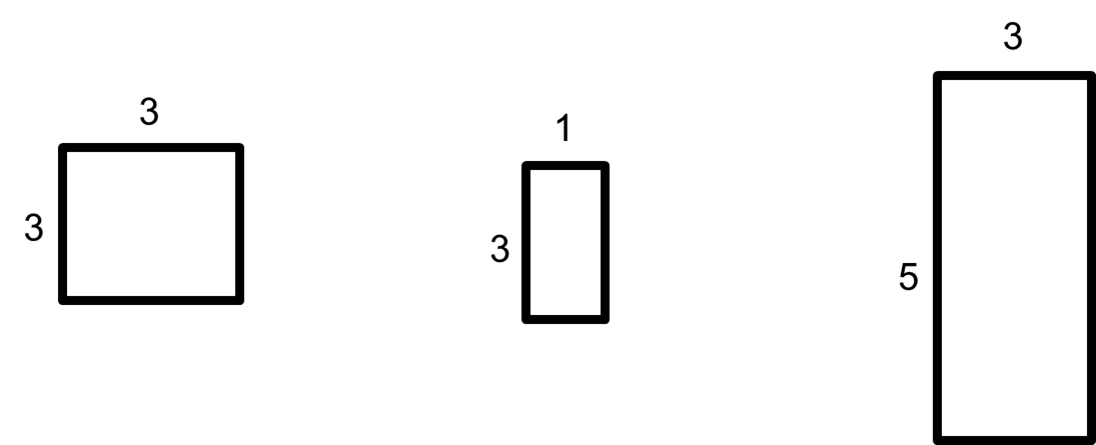

In [ ]:
c1=3*2+3*2
print(c1)
c2=1*2+3*2
print(c2)
c3=3*2+5*2
print(c3)

### <span style="color:red">כפילות בקוד</span>  

#### כפילות בקוד היא בעיה  
- באגים משוכפלים – קשה לתקן  
- קוד ארוך יותר  
- שגיאות Copy & Paste  

**פתרון: מימוש כפונקציה** כותבים פעם אחת – משתמשים שוב ושוב


In [55]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/zSpwiy63qAE?si=ktisCRum6tLqjGq5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### הגדרת פונקציה  
- רצף פקודות עם שם, שמבצע משימה מסוימת – באופן עצמאי משאר הקוד


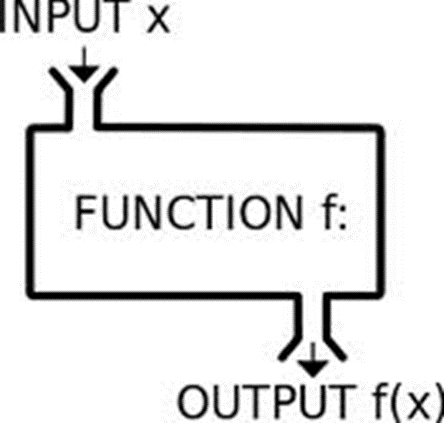

### למה פונקציות?  
- מודולריות – חלוקה למשימות קטנות, קוד לשימוש חוזר  
- הפשטה – פותרים פעם אחת, עוטפים בפונקציה  
- תחזוקה – תיקון באגים במקום אחד  
- קריאות – הקוד הראשי קצר יותר  
- טווח משתנים מוגבל – משתנים זמניים רק בתוך הפונקציה


### פונקציות מובנות  
- השתמשנו כבר בכמה פונקציות מובנות כמו `n()ו`type()`` le


In [ ]:
type(5)

In [ ]:
len("abcde")

בפייתון יש כמה וכמה פונקציות מובנות. אלו פונקציות שלדעת מפתחי השפה שימושיות ביותר, ותוכניות רבות עושות בהן שימוש, ולכן הוחלט לממש אותן כחלק מובנה בשפת פייתון.

ראינו למשל את הפונקציה המובנית len. פונקציה זו כאמור מקבלת מחרוזת או רשימה, ומחזירה לנו את האורך שלהן – כלומר מספר התווים במחרוזת או מספר האיברים ברשימה. למעשה, הפונקציה הזו יכולה לקבל עוד כמה טיפוסי נתונים בפייתון שלא פגשנו, כמו קבוצה (set), מילון (dict) ועוד, אך לא נעסוק בזה כאן.

השימוש בפונקציה len כבר הודגם. למשל אם נכתוב את הפקודות:

```python
n = len("This is a string")
print(n)
```

יודפס לנו 16.

שימו לב מה בדיוק קרה כאן: בפקודה הראשונה קראנו לפונקציה len ע"י כתיבת שמה ואז סוגריים עגולים. בתוך הסוגריים, רשמנו את המחרוזת שאת אורכה רצינו להדפיס. זהו הקלט של הפונקציה, שנקרא גם הפרמטר (parameter) שלה, מושג שעוד נתעמק בו בהמשך בשיעור. הפונקציה פעלה כפי שפעלה, בהתאם להגדרתה על ידי מפתחי שפת פייתון. מבחינתנו כאמור זוהי מעין "קופסה שחורה" – אנחנו לא צריכים לדעת איך בדיוק הפונקציה עובדת, אלא רק מהו אופן השימוש בה. ואכן, הפונקציה החזירה לנו כפלט את אורך המחרוזת, 16, אותו שמרנו במשתנה בשם n (זהו שם מאוד מקובל לשמירת מספרים שלמים, ובפרט אורכי מחרוזות או רשימות. אבל כמובן יכולנו להשתמש בשם אחר).

בפקודה השניה קראנו לפונקציה מובנית נוספת בפייתון – הפונקציה print. זוהי פונקציה שמקבלת ערך כלשהו כקלט. פעולתה של הפונקציה print היא הדפסת הערך שקיבלה (למסך, אם לא הגדרנו משהו אחר). ומה הפלט של הפונקציה print? כאן קורה משהו מעט מבלבל, אז בואו נחכה עם זה כמה רגעים, ומייד נחזור לנקודה הזו.

אם כן, יש לנו בפקודה התמימה הזו קריאה לשתי פונקציות, קודם len, שקיבלה את הקלט "This is a string" והחזירה כפלט את המספר 16, ואז התבצעה קריאה לפונקציה print שקיבלה כקלט את המספר 16, ופשוט הדפיסה אותו.

יכולנו גם לוותר על המשתנה n ולכתוב את שתי הפקודות כך:
```python
print(len("This is a string"))
```

התוצאה היא בדיוק אותה תוצאה. פשוט במקום לשמור את תוצאת הקריאה ל- len במשתנה ואז להעביר אותו לפונקציה print, עשינו זאת בבת אחת. את הפקודה הזו צריך לקרוא "מבפנים החוצה" – קודם קוראים ל- len, ואת מה שהיא מחזירה (16 בדוגמה הזו) מעבירים מייד ל- print לצורך הדפסה.

אם כן, זיכרו את הנקודה החשובה הבאה: ערך שמוחזר מפונקציה יכול להישמר במשתנה, ואז ניתן לעשות שימוש במשתנה הזה ככל שדרוש, או לחילופין אפשר להשתמש בערך המוחזר מייד בלי משתנה עזר, ולמשל להעביר אותו ישירות כקלט לפונקציה אחרת. הדרך הראשונה (שימוש במשתנה) מתאימה כאשר אנחנו רוצים להשתמש בערך שאותו החזירה הפונקציה יותר מפעם אחת. למשל:

```python
n = len("This is a string")
print(n)
if n > 10:
    print("this is a long string")
elif n < 5:
    print("This is a short string")
בדוגמה הזו, אילו לא שמרנו את אורך המחרוזת במשתנה, היה עלינו לקרוא לפונקציה len שוב ושוב:

print(len("This is a string"))
if len("This is a string") > 10:
    print("this is a long string")
elif len("This is a string") < 5:
    print("This is a short string")
```
זה כמובן מסורבל יותר. בנוסף, אם פתאום נחליט לשנות את המחרוזת מ- This is a string למשהו אחר, למשל This is my string, ניאלץ לשנות זאת בשלושה מקומות! מעבר לכך, קריאה חוזרת לפונקציה עלולה להשפיע לרעה על זמן הריצה של התוכנית (אם כי לא במקרה זה, בו זמן הריצה הוא ממש זניח, כמה מילי שניות וזהו).

נחזור עכשיו לשאלת הפלט של הפונקציה `print()`.

שימו לב לפקודות הבאות:

In [56]:
result = print(1+2)
print(result)

3
None


כפי שאתם רואים, ההדפסה הראשונה היא כמובן של הערך 3. ההדפסה השניה, של המשתנה result נתנה לנו את הערך `None`. זו הדרך של פייתון לומר "כלום". זהו ערך מיוחד בפייתון שמשמש בדיוק למקרים כאלו, בהם פונקציה מסויימת לא מחזירה שום ערך. וזה מה שקורה בפונקציה `print`, היא למעשה לא מחזירה שום פלט. שימו לב – ההדפסה עצמה היא הפעולה של הפונקציה `print`, בדומה לכך שפעולתה של הפונקציה `len` היא חישוב האורך. אבל מעבר לפעולת ההדפסה אין ל- `print` שום פלט (או ליתר דיוק יש לה פלט ריק). זה יכול מעט לבלבל. אבל פשוט זיכרו – אל תשמרו או תנסו לבצע פעולות על הערך שמחזירה `print` אף פעם. הנה דוגמה:

In [ ]:
print(3)+print(4)

אם תריצו את הפקודה, תגלו שלאחר הדפסת הערך 3 ואז הערך 4, נעשה נסיון לחבר את הערכים שהקריאות ל-print החזירו. למעשה ביקשנו מפייתון לחבר "כלום" עם "כלום" (שימו לב – לא 0 עם 0!), ולכן נקבל הודעת שגיאה:

```python
unsupported operand type(s) for +: 'NoneType' and 'NoneType'
```

**הפעולה + לא מוגדרת על ערכים מטיפוס None.**

לסיום, חשוב להזכיר שתי טעויות נפוצות מאוד בשימוש בפונקציות. האחת קשורה לקלט, והשניה לפלט.

**1. העברת קלט לא חוקי לפונקציה.**

מה קורה אם נתתם לפונקציה קלט שאינו מתאים עבורה? אם הקלט ממש לא חוקי, נקבל הודעה שגיאה. למשל, אם ננסה לקרוא לפונקציה sorted על רשימה שמכילה גם מחרוזות וגם מספרים. פייתון כזכור יודע להשוות מספרים למספרים, וגם מחרוזות למחרוזות. אבל לא מספרים למחרוזות. לכן פקודה כמו:

In [ ]:
print(sorted([1,2,3,"computer"]))

תגרור הודעת שגיאה.

פונקציות מובנות נוספות ניתן למצוא [כאן](http://docs.python.org/library/functions.html)


### הגדרת פונקציה חדשה ב-Python  

#### כתיבת פונקציה:


```python
def function_name(parameter1, parameter2,...):
    statement1
    statement2
    statement3
    ...
    return result1, result2, ...
```


- <span style="color:red">שימו לב לכניסות (indentation)!</span>  
- `return` היא פקודה אופציונלית  
    - אם לא נכתבת – מוחזר None

#### קריאה לפונקציה:
```python
var1, var2,… = function_name(val1, val2,...)
```

### נחזור לדוגמה שלנו: חישוב היקף מלבנים  


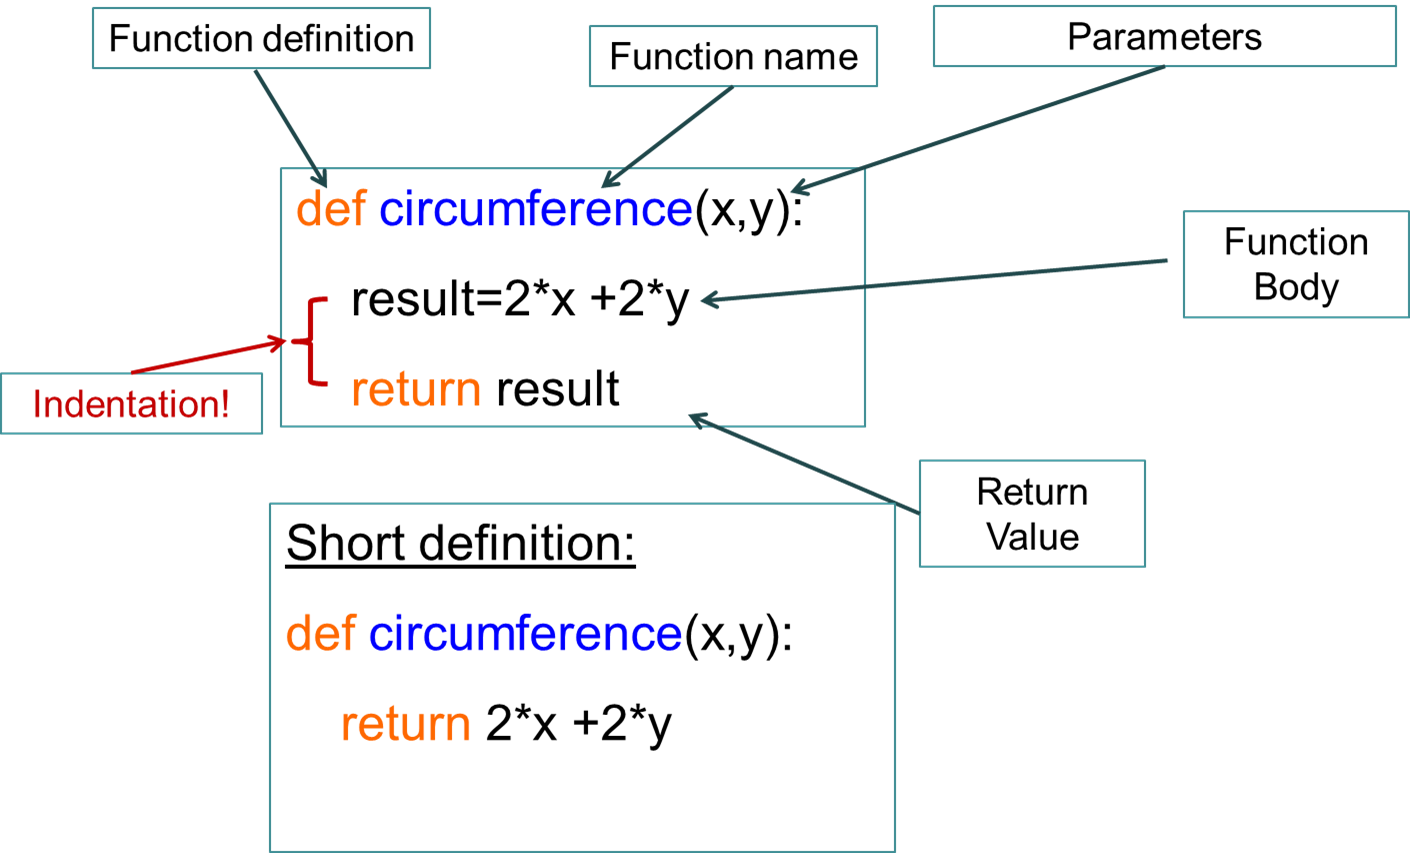

### הגדרת הפונקציה  


In [ ]:
def circumference(x,y):
    return 2*x +2*y

### שימוש בפונקציה (קריאה לה)  

In [ ]:
a = circumference(4,6)
print(a)

In [ ]:
print(circumference(2,3))

### קלט ופלט של פונקציות  
- קלט: פרמטרים (arguments) – יכולים להיות מכל סוג  
- פלט: פקודת return  
    - מחזירה ערך/ים (כל סוג), או None  

<h4 style="color:red">שימו לב</h4>

- `return` מפסיק מיידית את ריצת הפונקציה ומחזיר ערך  
- פקודות `return` ו`print` מבצעות דברים שונים
    - `print` פיסה למסך ואינה מחזירה דבר (מחזירה None)
    - `return` מחזירה ערך אבל לא מדפיסה למסך


In [155]:
def foo1(x):
    return x

def foo2(x):
    print("x value:", x)

res1=foo1(x)
print('res1 value:', res1)
res2=foo2(x)
print('res2 value:', res2)

res1 value: 20
x value: 20
res2 value: None


In [ ]:
def print_lyrics():
    print("The wheels on the bus go round and round")
    print("Round and round, round and round")
def repeat_lyrics(): 
    print_lyrics() 
    print_lyrics()
    
repeat_lyrics()


אפשר לבדוק את זה פה:  
[Python Tutor](https://pythontutor.com/render.html#code=def%20print_lyrics%28%29%3A%0A%20%20%20%20print%28%22The%20wheels%20on%20the%20bus%20go%20round%20ו%20round%22%29%0A%20%20%20%20print%28%22Round%20ו%20round,%20round%20ו%20round%22%29%0Adef%20repeat_lyrics%28%29%3A%20%0A%20%20%20%20print_lyrics%28%29%20%0A%20%20%20%20print_lyrics%28%29%0A%20%20%20%20%0Arepeat_lyrics%28%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)


### העמקה

עד כה למדנו מהן פונקציות, והדגמנו שימוש בפונקציות מובנות של פייתון.
הפונקציות המובנות של פייתון עונות על כמה צרכים בסיסיים ונפוצים, אבל בהרבה מקרים אין פונקציה מובנית שמתאימה לצרכינו.

בכעת אנו לומדים לכתוב פונקציות משל עצמנו. פונקציות כאלו ישמשו אותנו (או מתכנתים אחרים) בדיוק באותו אופן שהפונקציות המובנות של פייתון שימשו אותנו. כלומר לאחר שבנינו פונקציה חדשה, נוכל לקרוא לה עם הפרמטרים המתאימים, והיא תחזיר לנו את הפלט המצופה.
כזכור, פונקציות כאלו נקראות לעיתים "קופסאות שקופות". בשונה מקופסאות שחורות, פרטי הפונקציות שאנחנו כתבנו גלויים לנו כמובן.

בעת בניית פונקציה חדשה עלינו לחשוב תחילה על הנקודות הבאות:

**1. איזה שם נרצה לתת לפונקציה?**

נרצה לתת לפונקציה החדשה שלנו שם משמעותי, שמעיד על פעולתה.
למשל, אם הפונקציה מחשבת ממוצע של רשימת מספרים, כדאי לקרוא לה average או avg. פונקציה שמקבלת מחרוזת והופכת אותה משמאל לימין תיקרא למשל reverse ולפונקציה שבודקת אם מספר נתון הוא ראשוני כדאי לקרוא לדוגמה is_prime.

**2. מהם הקלטים (שם אחר: פרמטרים) שהפונקציה צריכה לקבל? כמה כאלו יש ואילו שמות כדאי לתת להם?**

גם כאן מומלץ לתת לפרמטרים שמות משמעותיים.

פונקציה לחישוב ממומצע של רשימת מספרים צריכה לקבל פרמטר אחד - רשימת מספרים. רשימות ייקראו לרוב lst, my_list וכד'. כדי להדגיש שמדובר ברשימת מספרים ולא "סתם" רשימה, אפשר לקרוא לה למשל num_lst. אם מדובר ברשימה בעלת משמעות ספציפית יותר, לדוגמה רשימת ציונים, אפשר לקרוא לה grade_lst.

פונקציה להיפוך מחרוזת צריכה לקבל את המחרוזת שאותה רוצים להפוך. אם מדובר במחרוזת ללא הקשר ספציפי, נקרא לה פשוט s או st או string או text וכו'. אם מדובר למשל בשם של אדם אפשר לקרוא לה name, וכו'.

כדי לבדוק אם מספר הוא ראשוני הפונקציה צריכה לקבל מספר שלם. שמות מקובלים למספרים שלמים הם אותיות בודדות קטנות באנגלית, למשל a, b, c ולפעמים n, m. אם יש לנו יותר משלושה או ארבעה מספרים בקלט, נוח לקרוא להם למשל n1, n2, n3, .... גם כאן, אם המספר הוא בעל משמעות ספציפית יותר, כדאי שהשם יישקף זאת. למשל אם המספר הוא קוד סודי כלשהו או סיסמה, נקרא לו code או pass_num וכו'.

**3. מה הפלט שהפונקציה אמורה להחזיר ומה הטיפוס שלו?**

אם חישבנו ממוצע של רשימת מספרים, הפלט הוא מספר, לא בהכרח שלם. כלומר ערך מטיפוס float. פונקציה להיפוך מחרוזת תחזיר את תמונת המראה של המחרוזת, כלומר ערך מטיפוס str. ואילו פונקציה לבדיקה האם מספר הוא ראשוני תחזיר True (אם הוא ראשוני) או False (אם הוא לא ראשוני), ובכל מקרה ערך מטיפוס בוליאני (bool).

כדי להדגים כתיבת פונקציה חדשה בפייתון, נראה פונקציה לחישוב מקסימום בין שני מספרים. אגב, כזכור ישנה הפונקציה max בפייתון. היא מתוחכמת יותר מהבחינה שהיא יכולה לקבל כקלט שניים, שלושה, או מספר כלשהו של ערכים. הדוגמה שנראה מייד תאפשר לנו להציץ אל מתחת ל"מכסה המנוע" של max. אבל רק בשיעור 3 נבין באמת איך אפשר לחשב מקסימום בין מספר לא ידוע מראש של ערכים.

#### חישוב מקסימום בין שני ערכים – הפונקציה max2
נבחן תחילה את 3 הנקודות שהזכרנו קודם.

1. מכיוון שהפונקציה שאנחנו רוצים לכתוב אמורה לחשב מקסימום בין שני ערכים, סביר מאוד לקרוא לה max2 (גם כדי להבחין אותה מ- max של פייתון, וגם כי יהיו לנו max3, max4 ועוד בהמשך...).
2. הפונקציה max2 תקבל כקלט שני ערכים – שני מספרים. נקרא להם a ו- b.
3. הפונקציה אמורה להחזיר ערך ששוה לאחד משני המספרים – הגדול מביניהם (אם הם שווים אז לא משנה איזה מהם נבחר).

כך תיראה הפונקציה בפייתון:

In [59]:
def max2(a,b):
    if a > b:
	    return a
    else:
	    return b

בואו נעבור על המרכיבים השונים. התחלנו עם המילה `def` שאומרת שאנחנו הולכים להגדיר כעת פונקציה חדשה. לאחר מכן רשמנו את השם שבחרנו לפונקציה, ואז, בתוך סוגריים עגולים, את השמות שבחרנו לפרמטרים, מופרדים בפסיקים. לאחר מכן נקודתיים. עד כאן רשמנו את ה"כותרת" של הפונקציה.

כעת נותר לרשום מה הפונקציה עושה. כדי לחשב מיהו הערך הגדול יותר, נשתמש במשפט תנאי. נשאל האם a>b, ואם כן, הפונקציה תסיים את פעולתה עם a כפלט. ב"תסיים את פעולתה" הכוונה שמי שקרא לפונקציה יקבל בחזרה את הערך של a. זה קורה באמצעות הפקודה return a. כלומר ברגע שמגיעים לפקודת return בעת ביצוע של פונקציה, הפונקציה מסיימת ומחזירה את הערך שכתוב אחרי המילה return למי שקרא לפונקציה. באופן דומה, אם התנאי לא מתקיים (כי a לא גדול מ- b, כלומר b גדול או שווה ל- a), הפונקציה תסיים את עבודתה אבל תחזיר את b.

ברגע שסיימנו להגדיר פונקציה, היא מוכנה לפעולה. אפשר לקרוא לה ממש כמו שקראנו לפונקציות המובנות של פייתון.
למשל, הריצו את הקוד הבא:

In [60]:
res = max2(5,7)
print(res)

7


<h4 style="color:purple">
בחנו את עצמכם
</h4>




לפניכם פונקציה קצרה בפייתון המקבלת מחרוזת לא ריקה המכילה ספרות בלבד.

```python
def avg(s):
    return int(s[0])/len(lst)
```

In [66]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "נניח שרשימת הקלט היא רשימת מספרים. מה הוא טיפוס המשתנה אותו מחזירה הפונקציה?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "float",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "str",
                "correct": false,
                "feedback": "לא נכון"

            },
            { 
                "answer": "לא ניתן לקבוע",
                "correct": false,
                "feedback": "לא נכון"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

# תנאים (`if`)

In [92]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/99ZTmBPlIJ0?si=x624C0wv8K9WnssW" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

<h4 style="color:purple">
בחנו את עצמכם
</h4>

לפניכם תרשים זרימה:

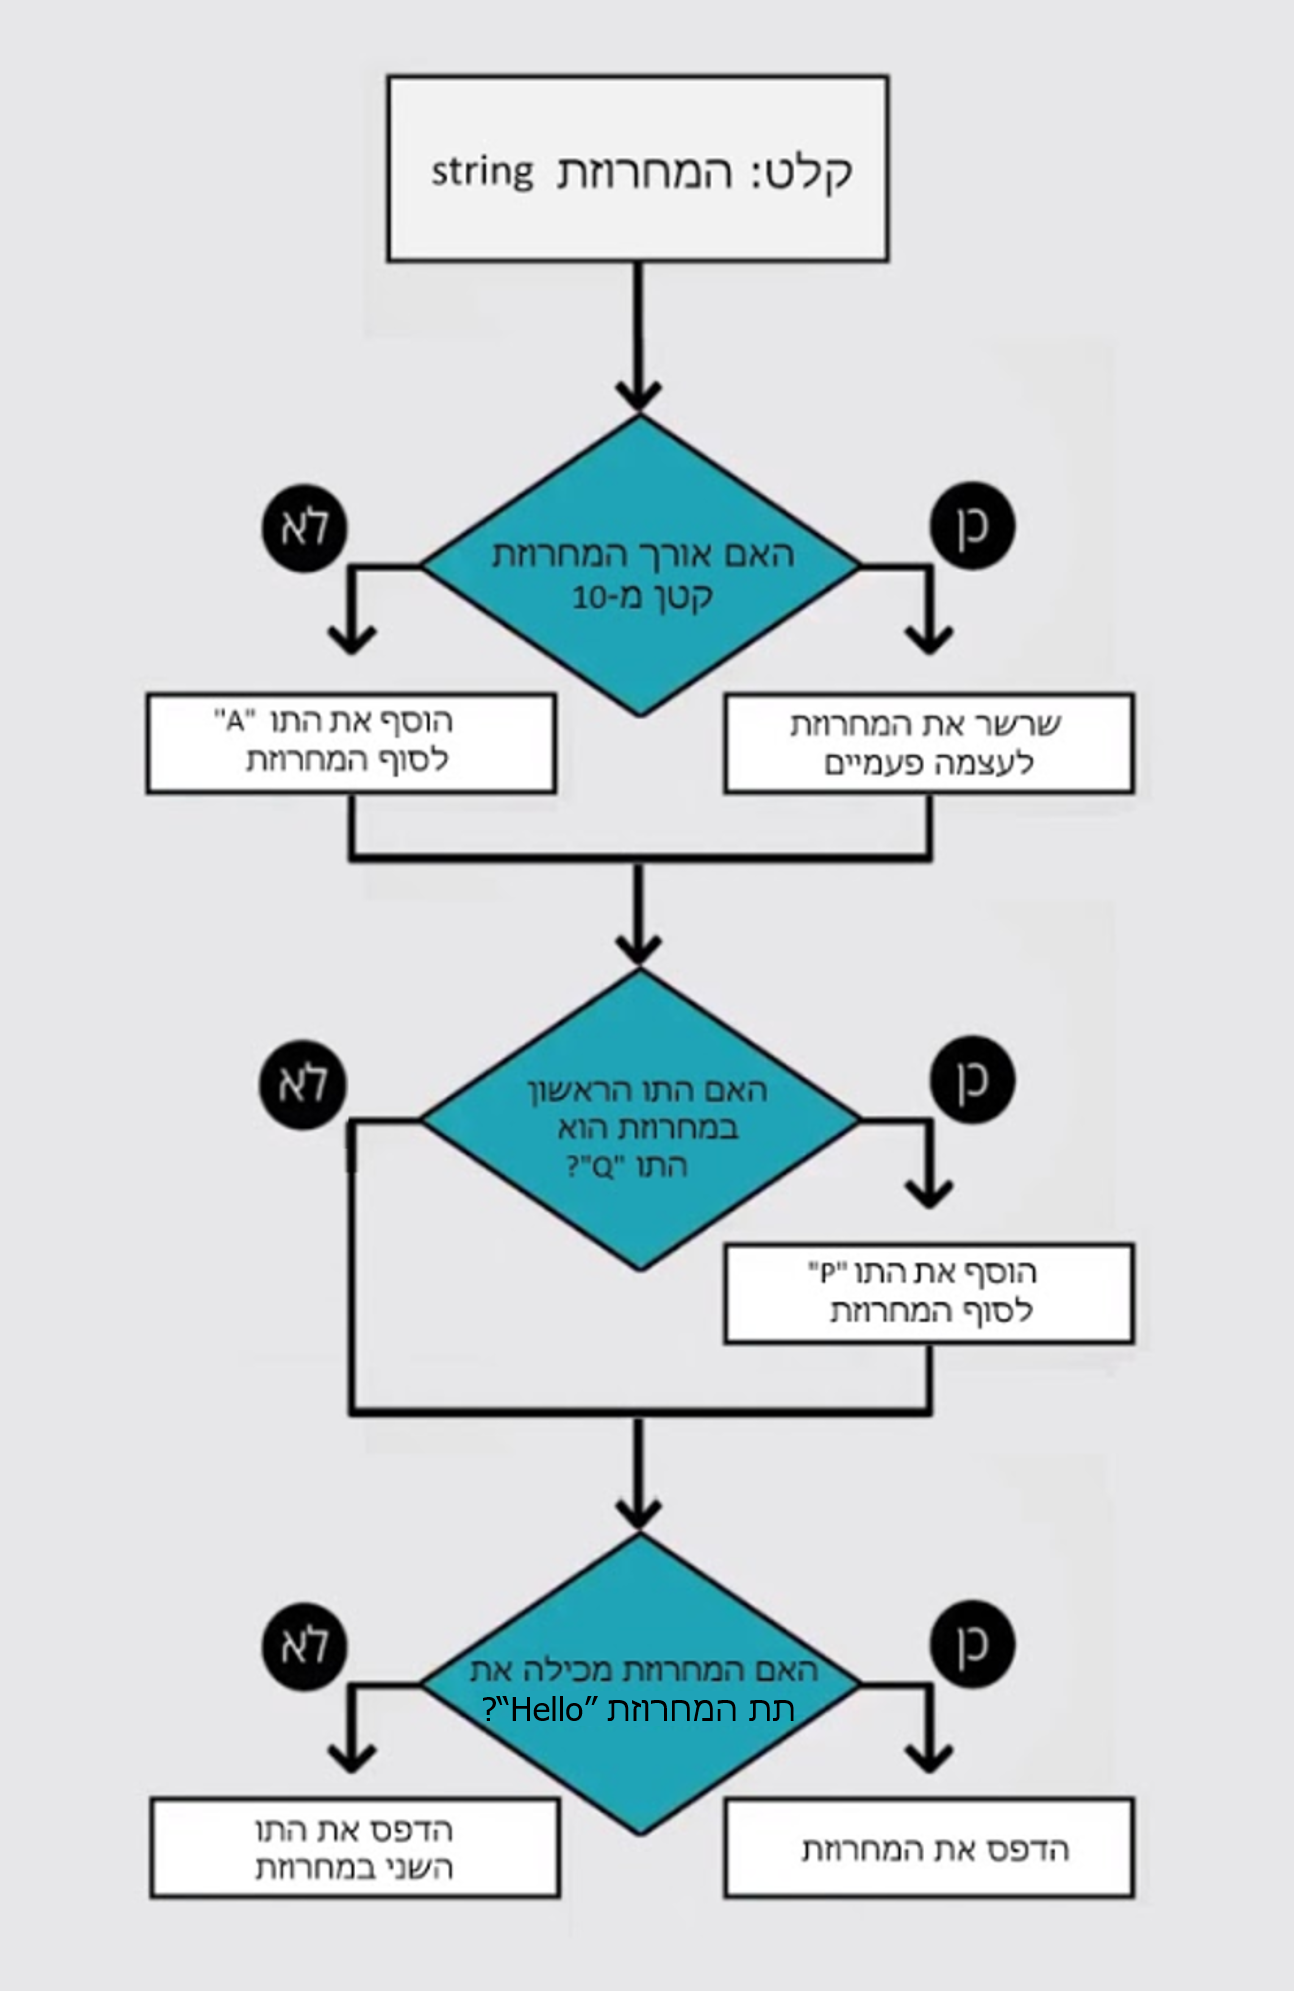</img>

In [95]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה יודפס בסוף התרשים עבור כל אחד מהקלטים הבאים:",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Hello world",
                "feedback": "Hello worldA"
            },
            {
                "answer": "hello",
                "feedback": "e"
            },
            { 
                "answer": "QHello",
                "feedback": "QHelloQHelloP"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

### משפטי התנאי `if` ו`if-else` בפייתון

In [96]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/UzWdVXUIsVk?si=coMRVO0gmlrf-48v" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [98]:
temp = 18

if temp < 20:
    print("Eat soup!")
    print("Enjoy!")
else:
    print("Eat a salad!")
print("Bon appetit!")

Eat soup!
Enjoy!
Bon appetit!


### סיכום: תחביר תנאי פשוט (`if`)
משפטי תנאי (או פקודות תנאי) הם סוג פקודות בסיסי בתכנות המאפשר לנו לשלוט בסדר
הפעולות של התוכנית אותה אנחנו כותבים. משפטי תנאי מאפשרים להתנות ריצה של
חלק מסוים בקוד בקיומו (או אי-קיומו של תנאי מסוים).
ראינו כמה דוגמאות לכך:
הערה: יופיעו כעת מספר קטעי בהם יופיע תנאי כללי בשם condition. תנאי זה הוא בעל
ערך בוליאני בפייתון, כלומר ערכו הוא True או False. כאשר אנחנו כותבים תוכנית
בפייתון, תנאי זה יכול ללבוש צורה של כל ביטוי בעל ערך בוליאני, כמו למשל 3>5 (False),
3==3 (True) וכו.
הצורה הבסיסית ביותר היא ביצוע פקודות מסוימות אם תנאי מסוים מתקיים.
במקרה זה הקוד בנוי כך:

```python
if condition:
    statement1
    statement2
statement3
```

שימו לב – לאחר משפט התנאי (שמתחיל ב-if) יש צורך לשים נקודותיים

אם ערכו של condition הוא True, אז יורצו השורות statement1 ו-statement2 (המוזחות ארבעה רווחים או טאב ימינה), ולאחר מכן ירוץ statement3. הקוד שנמצא מתחת לשורה שמתחילה ב-if
אם ערכו של condition הוא False, נדלג על המוזח ימינה (statement1 ו-statement2) ונמשיך לקוד הבא בתכנית (statement3)


#### תרשים סיכום לתנאי פשוט (`if`):

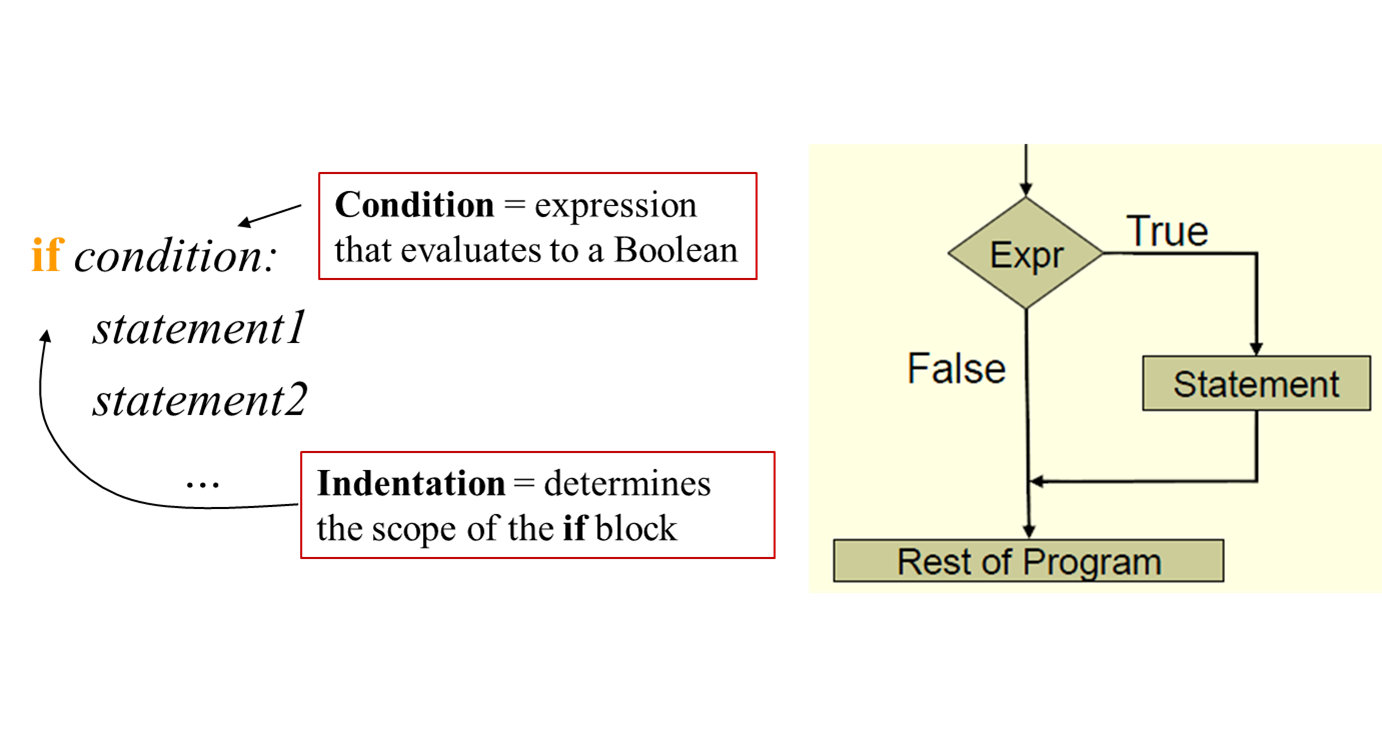

### דוגמא נוספת ל־`if` 

הקוד הבא בודק אם מספר הקלט מתחלק ב18

<h4 style="color:purple">
נסו בעצמכם
</h4>

In [ ]:
def divisible(num):
    if num % 18 == 0:
        print(num, "is divisible by 18")
    print("Goodbye")

In [ ]:
divisible(53) 

### סיכום: תחביר `if-else`


צורת תנאי נוספת היא ביצוע פקודות מסוימות כאשר תנאי מסוים מתקיים, ופקודות
אחרות כאשר התנאי אינו מתקיים. במקרה זה הקוד בנוי כך:


```python
if condition1:
    statement1
else:
    statement2

statement3
```

גם כאן אם condition הוא True ירוץ הקוד שמתחת ל-if, אך אם condition הוא
False, ירוץ דווקא הקוד שנמצא מתחת ל-else. שימו לב שגם לאחר ה-else מופיעות
נקודותיים. נדגיש כי במבנה כזה של משפט תנאי בכל מקרה אחד מקטעי הקוד הנ"ל
ירוצו, בהתאם לערכו של condition. לאחר ריצת אחד מקטעי הקוד התוכנית ממשיכה
לרוץ לפי הקוד שאחרי משפטי התנאי האלו.

#### הזחה:  
- `else` משויך ל־`if`, אם הוא ברמה מקבילה אם הוא בא מיד לאחר השורות שבתוך הif (או הelif כפי שנלמד בהמשך), וכן, נמצא באותה רמת הזחה כמו הif
- הפקודות שבתוך else מוזחות גם הן פנימה


#### תרשים סיכום ל-`if-else`:


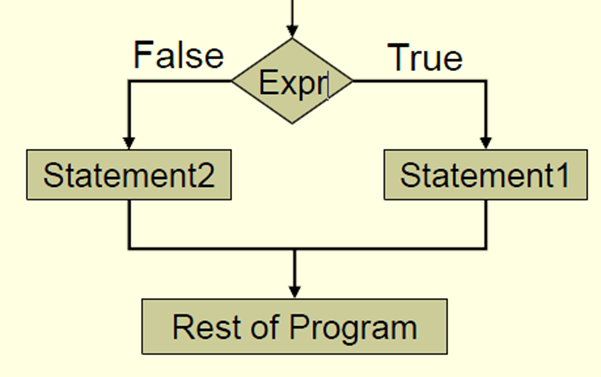






### דוגמא נוספת ל־`if-else`

הקוד הבא מקבל 2 צלעות סמוכות של מלבן ומחזירה אם המלבן הוא גם ריבוע

<h4 style="color:purple">
נסו בעצמכם
</h4>




In [ ]:
def is_square(width, height):
    if width == height:
        print("found a square")
    else:
        print("found a rectangle")
    print("done")

In [ ]:
is_square(4,4)

<h4 style="color:purple">
בחנו את עצמכם
</h4>

בתרגיל זה אתם תכתבו קוד פייתון שיעזור למשתמש להחליט (לפני שהוא יוצא מהבית) האם עליו לקחת כובע, מעיל, או מטריה.

ההחלטה נעשית לפי תרשים הזרימה הבא:

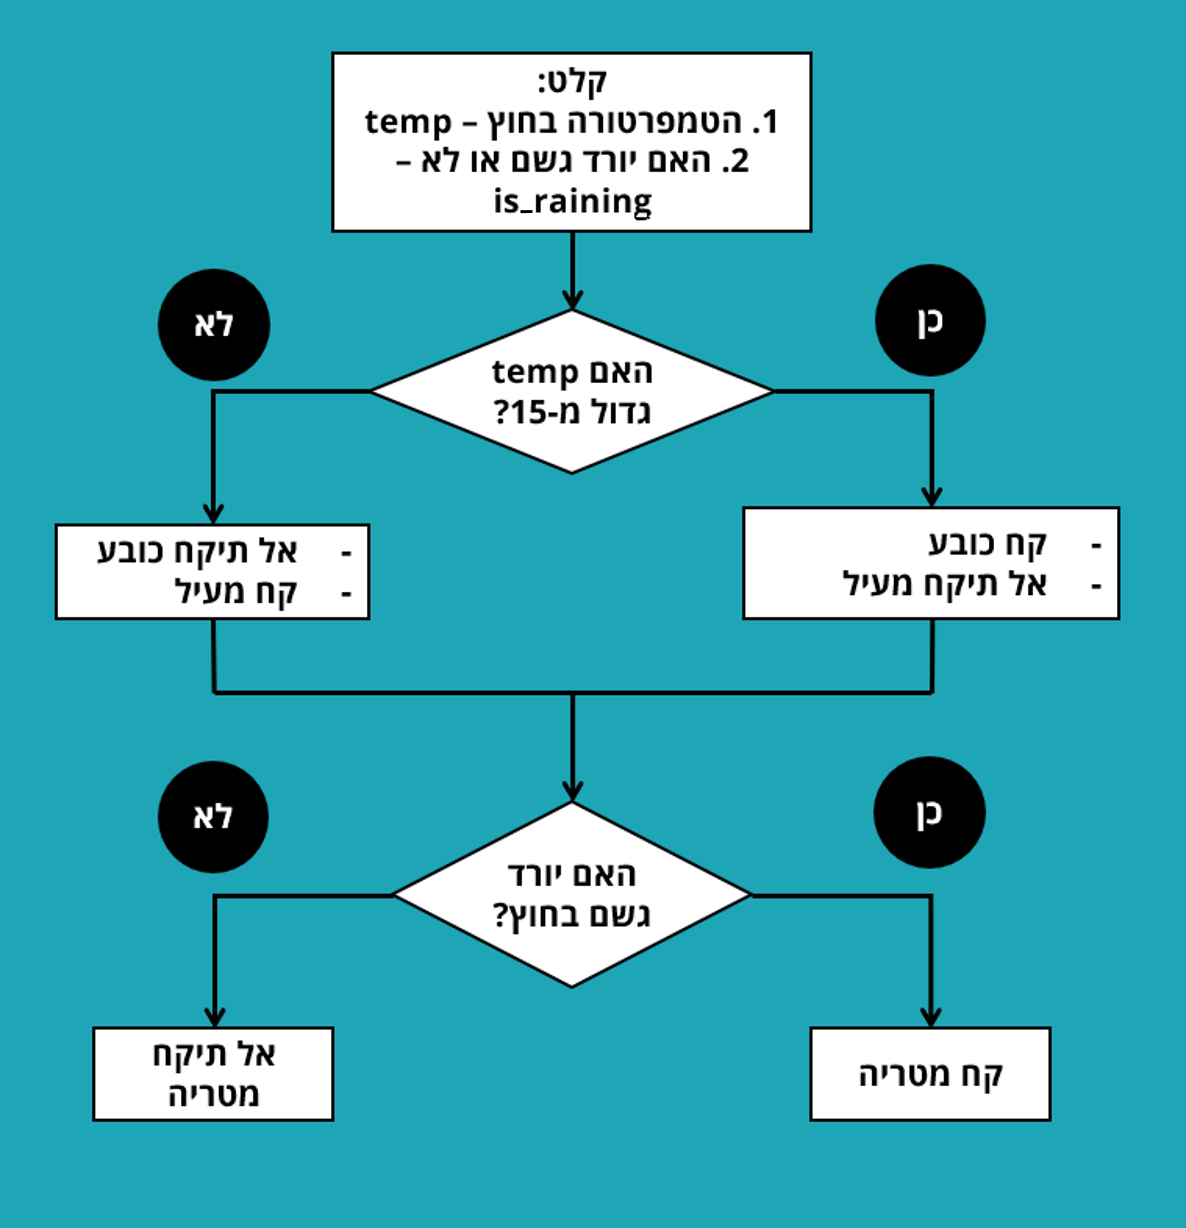

הקלט לבעיה הוא שני משתנים - מספר בשם temp שערכו הוא הטמפרטורה בחוץ, ומשתנה בוליאני (משתנה שערכו אמת או שקר) בשם is_raining - כאשר is_raining הוא True אז יורד גשם בחוץ.

עליכם "לתרגם" את תרשים הזרימה לקוד הכולל תנאי if ו-else, בדומה למה שראינו בסרטון. כדי להחליט אם ניקח כובע, מעיל, או מטריה, אתחלנו עבורכם 3 משתנים בוליאניים ששמותיהם hat (כובע), coat (מעיל), ו-umbrella (מטריה). אם לפי תרשים הזרימה צריך לקחת את אחד מהפריטים האלו - שנו את ערכו במקום המתאים בקוד ל-True, ואם לא צריך - שנו אותו ל-False. למשל - אם הטמפרטורה בחוץ היא 20 מעלות ולא יורד גשם - אז צריך להתקיים hat = True, coat = False, umbrella = False.
הקפידו לכתוב True ו- False עם אות ראשונה גדולה.

בדקו את הקוד שלכם - שנו את ערכי משתני הקלט של הבעיה (temp ו-is_raining) והריצו את הקוד. הפתרונות שלכם ייבדקו מול הפתרון הנכון, ותוכלו לקבל על כך משוב בחלונית הפלט.


In [108]:
# input variables
temp = 20
is_raining = False

# output variables
hat = False
umbrella = False
coat = False

# Write you solution here:


##### פתרון

In [109]:
# input variables
temp = 20
is_raining = False

# output variables
hat = False
umbrella = False
coat = False

# Check temperature
if temp > 15:
    # In case it is hot
    hat = True
    coat = False
else:
    # In case it is not hot
    hat = False
    coat = True

# Check if raining    
if is_raining:
    # If it's raining
    umbrella = True
else:
    # If it's not raining
    umbrella = False
    
# Print results    
if hat:
    print("You should take a hat")
else:
    print("You shouldnt take a hat")
    
if coat:
    print("You should take a coat")
else:
    print("You shouldnt take a coat")
    
if umbrella:
    print("You should take an umbrella")
else:
    print("You shouldnt take an umbrella")

You should take a hat
You shouldnt take a coat
You shouldnt take an umbrella


### תנאים מקוננים (nested ifs) או, תנאי בתוך תנאי

In [101]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/qoQ7wxMXMvc?si=JF1Z6pv5U9j-hUnl" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [103]:
temp = 25
wait = 60

if temp < 20:
    print("Eat soup!")
    print("Enjoy!")
    if wait >= 40:
        print("Order a delivery")
    else:
        print("Prepare dinner yourself")
else:
    print("Eat a salad!")
print("Bon appetit!")

Eat a salad!
Bon appetit!


### דוגמא נוספת לתנאים מקוננים

הקוד הבא בודק אם מספר הקלט מתחלק ב2, 3 ו6 ומדפיס את הטקסט המתאים

<h4 style="color:purple">
נסו בעצמכם
</h4>




In [ ]:
def is_divisible(n):
    if n % 3 == 0: 
        if n % 2 == 0: # NESTED if
            print('divisible by 2,3,6')
        else: # NESTED else, pertains to INNER if.
            print('divisible by 3')
    else: # Not nested, thus pertains to OUTER if.
        if n % 2 == 0: # NESTED if
            print('divisible by 2')
        else:
            print(n + ' is not divisible by 3.')

### משפט תנאי `if-elif-else`

כאשר יש לנו הרבה תנאים מקוננים במבנה של if...else, התוכנית שלנו עלולה "להימתח" ימינה בצורה מוגזמת:
```python
if תנאי 1:
	
else:
	if תנאי 2:
		
	else:
		if תנאי 3:
			
		else:
			if תנאי 4:
				
			else:
```

כדי להימנע מזה, בפייתון ניתן לקצר את:
```python
else:
    if תנאי: 
```
באופן הבא:
```python
elif תנאי: 
```
כלומר elif הוא קיצור של else ומייד אחריו if.

התוכנית שלעיל תיראה כך:
```python
if תנאי 1:
elif תנאי 2:
elif תנאי 3:
elif תנאי 4:
```


<h4 style="color:purple">
בחנו את עצמכם
</h4>

1. לפניכם פונקציות foo1 ו-foo2

In [111]:
def foo1(x):
    if x < 10:
        x=x+8
    else:
        x=x+1

def foo2(x):
    if x<10:
        x=x+8
    elif x>20:
        x=x+1

In [114]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "עבור אילו ערכי קלט יניבו הפונקציות תוצאה זהה?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "15",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "0",
                "correct": true,
                "feedback": "נכון!"
            },
            { 
                "answer": "-20",
                "correct": true,
                "feedback": "נכון!"

            },
            { 
                "answer": "100",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

2. לפניכם תוכנית קצרה:

In [117]:
def foo3(x):
    if x > 10: 
    	x = x + 2
    if x > 6:
    	x = x * 2
    if x <  10:
    	if x == 5:
    		x = x * 3
    	else:
    		x = x * 10
    elif x <  20: 
    	x = x * 4
    if x > 7: 
    	x = x * 2
    if x > 2: 
    	x = x - 10

    return(x)

In [119]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מלאו בתיבה את הערך אותו תחזיר הקריאה foo3(5)",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 20,
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

### `if-elif-else`

#### elif = else if

```python
if condition1:
    statement1
elif condition2:
    statement2
else:
    statement3

rest of code
```

- אם condition1 נכון → statement1  
- אם condition1 שגוי ו־condition2 נכון → statement2  
- אחרת → statement3  
- לבסוף: המשך הקוד

In [ ]:
def which_triangle(a,b,c):
    if a == b and b == c:
        x="Equilateral triangle"
    elif a==b or a==c or b==c:
        x="Isosceles triangle"
    else:
        x="another kind of triangle"
    return x

In [ ]:
result=which_triangle(4,4,4)
print(result)

### שימוש באופרטורים לוגיים בתנאים

נניח שאנחנו מעוניינים לבדוק האם משתנים להלן שווים כולם זה לזה.

In [120]:
a = 111111111111 * 111111111111
b = 12345679012308641986431 + 12345667890
c = 12345679110300785634118 - 979797979797979

 אפשר כמובן להדפיס את המספרים ולבדוק זאת בעין, אבל המספרים האלו גדולים וזה לא יהיה כיף גדול (וגם אנחנו עלולים לטעות בקלות). 

 לעומת זאת, בעזרת שימוש בתנאים, ישנה דרך פשוטה לבדוק אם כל המספרים שווים זה לזה מבלי להדפיס אותם. הנה תוכנית בפייתון שעושה זאת:
 

In [ ]:
if a == b:
    if b == c:
        print("All numbers are equal")
    else:
        print("Not all numbers are equal")
else:
    print("Not all numbers are equal")

שימו לב שאין צורך לבדוק האם a == c כי ברגע שגילינו שגם a == b וגם b == c מתחייב ש-a == c הוא אמת.

את התוכנית הזאת היה אפשר לכתוב באופן מעט יותר נעים לעין, וגם לחסוך פקודת הדפסה אחת, ע"י שימוש באופרטור הלוגי `and` (וגם):

In [121]:
if a == b and b == c:
    print("All numbers are equal")
else:
    print("Not all numbers are equal")


Not all numbers are equal


המילה and משמשת כ"דבק" שמחבר שני תנאים בסיסיים לתנאי אחד מורכב. 

כפי שלמדנו, לחבר באמצעות and יותר מספר ערכים בוליאניים. למשל:


In [ ]:
a = 111111111111 * 111111111111
b = 12345679012308641986431 + 12345667890
c = 12345679110300785634118 – 979797979797979
d = 12345679110300785634118 – 97979797979797

if a == b and b == c and c == d:
    print("All numbers are equal")
else:
    print("Not all numbers are equal")

באופן דומה, ניתן להשתמש באופרטור הלוגי `or` (או) כדי לבדוק אם **לפחות אחד התנאים מתקיים**. במקרה שלנו, היינו משתמשים ב`or` אילו רצינו לבדוק אם מבין המספרים a, b ו-c יש שניים ששווים זה לזה:

In [122]:
if a == b or b == c or a == c:
    print("Some of the numbers are equal")
else:
    print("All numbers are different")

Some of the numbers are equal


שימו לב שכדי לבדוק אם יש שני ערכים שווים מבין a, b, c היינו צריכים לבדוק את כל שלוש האפשרויות, כפי שרואים בקוד.

הנה עוד דוגמה:

In [123]:
a = 12
if a == 10 or a == 11 or a == 12 or a == 13:
    print("a is between 10-13")

a is between 10-13


כאן אנחנו בודקים האם הערך של המשתנה a הוא 10 או 11 או 12 או 13. שימו לב שיש לחזור על התנאי במלואו בכל פעם. טעות נפוצה היא לנסות לקצר ולכתוב a == 10 or 11 or 12 or 13. זה לא עובד בפייתון, כי כל אחד מהתנאים הבסיסיים צריך לבדוק "האם a שווה ל...".

<h4 style="color:purple">
בחנו את עצמכם
</h4>

1. נתונה הפונקציה foo1 להלן:

In [125]:
def foo1(st):
    if "A" in st:
        return st
    elif len(st) > 3 or st[0] == "A" or st + "f" == "abcdef":
        return st*2
    else:
        return "what a nice day!"

In [130]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה תחזיר הקריאה foo1('abcde')?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "לא יוחזר כלום (None)",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "abcdeabcde",
                "correct": true,
                "feedback": "נכון!"
            },
            { 
                "answer": "!what a nice day",
                "correct": true,
                "feedback": "נכון!"

            },
            { 
                "answer": "abcde",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

2. נתונה הפונקציה foo2 להלן:

In [ ]:
def foo2(x,y,z):
    if z == y and (x != 6 or y > 1):
        print("hey!!!")
    else:
        print("Hi…")

In [135]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה תחזיר הקריאה foo2(6,4,'y')?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "לא יוחזר כלום (None)",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "תתקבל שגיאה",
                "correct": false,
                "feedback": "לא נכון"
            },
            { 
                "answer": " …Hi",
                "correct": true,
                "feedback": "נכון!"

            },
            { 
                "answer": "!!!hey",
                "correct": false,
                "feedback": "לא נכון"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

## דוגמא מסכמת: פונקציות ותנאים

In [67]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Qwfk_RGn0D4?si=TPmEipm3Me-5EYrx" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [68]:
def max2(a,b):
    if a > b:
        return a
    else:
        return b

# result = max2(3,5)
# print(result)
# result2 = max2(4,-5)
# print(result2)
x = 4
y = -5
#result3 = max2(x,y)
#print(result3)
result4 = max2(x + y + 3, x*y)
#print(result4)

def max3_v1(a,b,c):
    if a > b:
        if a > c:
            return a
        else:
            return c
    else:
        if b > c:
            return b
        else:
            return c

result5 = max3_v1(1,2,3)
#print(result5)

def max3_v2(a,b,c):
    if a > b and a > c:
        return a
    elif b >= a and b > c:
        return b
    else:
        return c

result6 = max3_v2(1,2,3)
print(result6)

3


<h4 style="color:purple">
בחנו את עצמכם
</h4>

הפונקציה הבאה מצפה לקבל כקלט שני משתנים, מחרוזת st ותו בודד c. מה תחזיר הפונקציה עבור קלט שכזה
```python
def what(st, c):
    if c in st:
        return True
    else:
        return False
```

In [84]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה תחזיר הפונקציה?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "האם מחרוזת נתונה st מכילה את תו נתון כלשהו c",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "כמה פעמים תו נתון כלשהו c מופיע במחרוזת נתונה st",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "האם מחרוזת st מכילה את האות השלישית באלפבית האנגלי c",
                "correct": false,
                "feedback": "לא נכון"

            },
            { 
                "answer": "כמה פעמים האות c (האות השלישית באלפבית האנגלי) מופיעה במחרוזת נתונה st",
                "correct": false,
                "feedback": "לא נכון"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

נתונה הפונקציה להלן
```python
 def what(st, c):
    return c in st
```

In [151]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה תחזיר הפונקציה?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "האם מחרוזת נתונה st מכילה את תו נתון כלשהו c",
                "correct": true,
                "feedback": "נכון! הביטוי c in st ערכו True או False, והפונקציה פשוט מחזירה ערך זה. זהו קיצור מקובל לפונקציה מהתרגיל הקודם."
            },
            {
                "answer": "האם תו כלשהו c נמצא בתחילתה של המחרוזת st",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "האם תו כלשהו c לא נמצא במחרוזת st",
                "correct": false,
                "feedback": "לא נכון"

            },
            { 
                "answer": "כמה פעמים תו נתון כלשהו c מופיע במחרוזת נתונה st",
                "correct": false,
                "feedback": "לא נכון"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>